In [132]:
import pandas as pd
import numpy as np
import math
import scipy
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [133]:
df = pd.read_csv("interview-dataset.csv")

In [134]:
df.head()

,batt_volt,block,comp_type,cur_after300ms_c,cur_after300ms_o,cur_c_arr.1,cur_c_arr.10,cur_c_arr.11,cur_c_arr.12,cur_c_arr.13,...,volt_o_arr.19,volt_o_arr.2,volt_o_arr.20,volt_o_arr.3,volt_o_arr.4,volt_o_arr.5,volt_o_arr.6,volt_o_arr.7,volt_o_arr.8,volt_o_arr.9
0,78.0,NaN,1,3.95,2.50,0.116670,0.343039,0.247163,0.173571,0.157684,...,32,22,14,64,71,74,75,76,75,72
1,78.0,NaN,1,3.95,2.50,0.101500,0.430537,0.312741,0.231342,0.137976,...,13,30,1,68,73,74,75,76,73,71
2,78.0,NaN,1,3.95,2.50,0.088552,0.377274,0.273320,0.197023,0.154048,...,9,29,1,69,73,74,75,75,72,69
3,78.0,NaN,1,3.95,2.50,0.143332,0.551478,0.419680,0.252282,0.161627,...,10,30,1,69,73,74,75,75,72,69
4,78.0,NaN,1,4.00,2.45,0.146724,0.619444,0.485517,0.344962,0.220329,...,9,33,1,69,73,74,75,75,72,69


In [135]:
df.shape

(1520, 303)

In [136]:
print(df.columns)

Index(['batt_volt', 'block', 'comp_type', 'cur_after300ms_c',
       'cur_after300ms_o', 'cur_c_arr.1', 'cur_c_arr.10', 'cur_c_arr.11',
       'cur_c_arr.12', 'cur_c_arr.13',
       ...
       'volt_o_arr.19', 'volt_o_arr.2', 'volt_o_arr.20', 'volt_o_arr.3',
       'volt_o_arr.4', 'volt_o_arr.5', 'volt_o_arr.6', 'volt_o_arr.7',
       'volt_o_arr.8', 'volt_o_arr.9'],
      dtype='object', length=303)


In [137]:
df.describe()
stat_info = df.describe()
stat_info.to_csv('stat_info.csv')
#Mean, Median, Max values of each Column

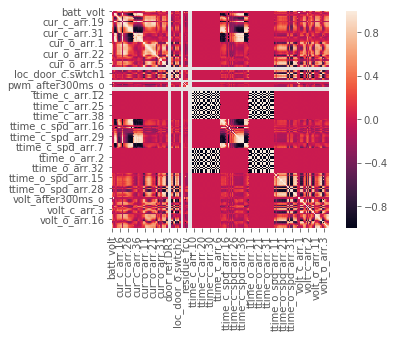

In [138]:
cor = df.corr()
sns.heatmap(cor, square = True)
#Correlation matrix to check the relationship of columns with other columns

In [139]:
corrmat = df.corr()
corrmat.to_csv('corrmat.csv')
#Correlation Matrix extracetd to check relationships of each columns

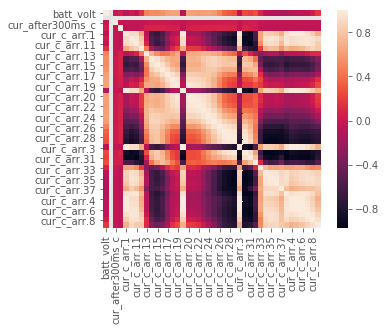

In [140]:
df_curr_c = df.iloc[:, :43]
cor_curr_c = df_curr_c.corr()
sns.heatmap(cor_curr_c, square = True)
#Correlation Matrix for "current while closing" values

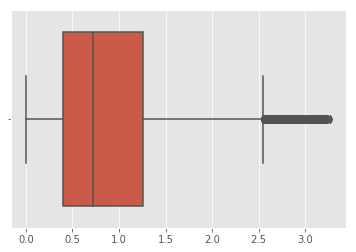

In [141]:
df_curr_cvc = df.iloc[:, 5:43].values
sns.boxplot(x=df_curr_cvc) 
#Box plot for "current while closing" values

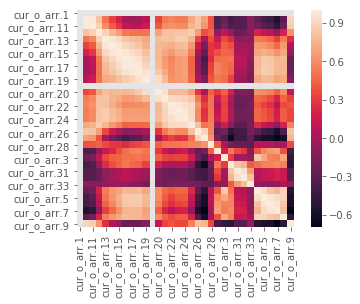

In [142]:
df_curr_o = df.iloc[:, 43:78]
cor_curr_o = df_curr_o.corr()
sns.heatmap(cor_curr_o, square = True)
#Correlation Matrix for "current while opening" values

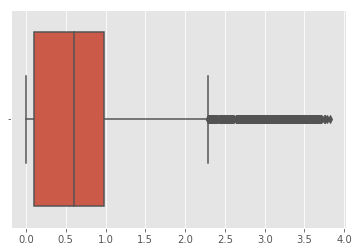

In [143]:
df_curr_cvo = df.iloc[:, 43:76].values
sns.boxplot(x=df_curr_cvo)
#Box plot for "current while opening" values

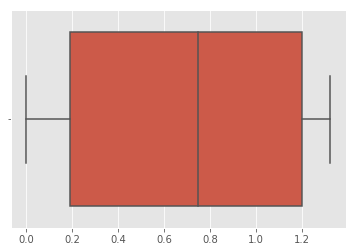

In [144]:
df_curr_cspdc= df.iloc[:, 157:195].values
sns.boxplot(x=df_curr_cspdc)
#box plot for "time taken to close" values

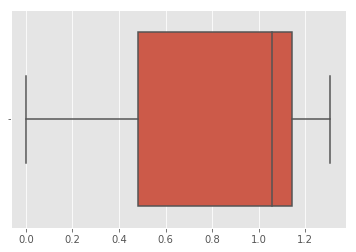

In [145]:
df_curr_cspdo = df.iloc[:, 229:261].values
sns.boxplot(x=df_curr_cspdo)
#box plot for "time taken to open" values

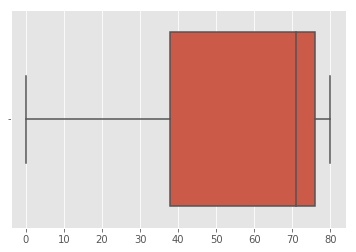

In [146]:
df_curr_cv = df.iloc[:, 264:].values
sns.boxplot(x=df_curr_cv)
#box plot for "voltage while closing and opening" values

In [147]:
df_reff=df.drop(['block', 'comp_type', 'cur_o_arr.1', 'datetime',
'volt_c_arr.1' , 'ttime_o_spd_arr.2' ,'ttime_o_spd_arr.1' , 'ttime_o_arr.5' , 'ttime_o_arr.30' , 
'ttime_o_arr.25' , 'ttime_o_arr.20' , 'ttime_o_arr.15' , 'ttime_o_arr.10' , 'ttime_c_arr.5' , 
'ttime_c_arr.35' , 'ttime_c_arr.30' , 'ttime_c_arr.25' , 'ttime_c_arr.20' , 'ttime_c_arr.15' , 
'ttime_c_arr.10' , 'train_id' , 'timecounter' , 'software_ver.octet3' ,'software_ver.octet0',
'software_ver.octet2', 'software_ver.octet1' , 'software_ver.octet0' , 'revision' , 
'product_type' , 'pred_maint_data_flg' , 'obstacledetected_o' , 'obstacledetected_c' ,
'eventcounter' ,'door_ref.DR5' , 'door_ref.DR3' , 'door_ref.DR2' , 'door_ref.DR1' , 'cur_o_arr.2' , 
'direction', 'door','door_ref.DR1','door_ref.DR2','door_ref.DR3',
'door_ref.DR4','door_ref.equip_loc', 'index','message','software_ver.octet3','station',
'time_first_opening','time_last_closing', 'ttime_c_arr.1','ttime_c_arr.11','ttime_c_arr.12',
'ttime_c_arr.13','ttime_c_arr.14','ttime_c_arr.16', 'numcumulsecpoweron',
'ttime_c_arr.17','ttime_c_arr.18','ttime_c_arr.19','ttime_c_arr.2',
'ttime_c_arr.21','ttime_c_arr.22','ttime_c_arr.23',
'ttime_c_arr.24','ttime_c_arr.26','ttime_c_arr.27','ttime_c_arr.28',
'ttime_c_arr.29','ttime_c_arr.3','ttime_c_arr.30','maint_ver',
'ttime_c_arr.31','ttime_c_arr.32','ttime_c_arr.9','ttime_c_arr.8','ttime_c_arr.7',
'ttime_c_arr.6','ttime_c_arr.4','ttime_c_arr.38',
'ttime_c_arr.33','ttime_c_arr.34','ttime_c_arr.36','ttime_c_arr.37',
'ttime_o_arr.1','ttime_o_arr.11','ttime_o_arr.12','ttime_o_arr.13',
'ttime_o_arr.14','ttime_o_arr.16','ttime_o_arr.17','ttime_o_arr.18',
'ttime_o_arr.19','ttime_o_arr.2','ttime_o_arr.21','ttime_o_arr.22',
'ttime_o_arr.23','ttime_o_arr.24','ttime_o_arr.26','ttime_o_arr.27',
'ttime_o_arr.28','ttime_o_arr.29','ttime_o_arr.3','ttime_o_arr.30','ttime_o_arr.31',
'ttime_o_arr.32','ttime_o_arr.33','ttime_o_arr.4','ttime_o_arr.6',
'ttime_o_arr.7','ttime_o_arr.8','ttime_o_arr.9'], axis = 1)

#removing columns based on information gain for several itteration done on clustring

In [148]:
df_reff.to_csv('df_reff.csv')
df_km = pd.read_csv("df_reff.csv")
# export new dataset for ref and use new data set

In [149]:
df_km.head()

,Unnamed: 0,batt_volt,cur_after300ms_c,cur_after300ms_o,cur_c_arr.1,cur_c_arr.10,cur_c_arr.11,cur_c_arr.12,cur_c_arr.13,cur_c_arr.14,...,volt_o_arr.19,volt_o_arr.2,volt_o_arr.20,volt_o_arr.3,volt_o_arr.4,volt_o_arr.5,volt_o_arr.6,volt_o_arr.7,volt_o_arr.8,volt_o_arr.9
0,0,78.0,3.95,2.50,0.116670,0.343039,0.247163,0.173571,0.157684,0.211577,...,32,22,14,64,71,74,75,76,75,72
1,1,78.0,3.95,2.50,0.101500,0.430537,0.312741,0.231342,0.137976,0.207730,...,13,30,1,68,73,74,75,76,73,71
2,2,78.0,3.95,2.50,0.088552,0.377274,0.273320,0.197023,0.154048,0.258048,...,9,29,1,69,73,74,75,75,72,69
3,3,78.0,3.95,2.50,0.143332,0.551478,0.419680,0.252282,0.161627,0.165689,...,10,30,1,69,73,74,75,75,72,69
4,4,78.0,4.00,2.45,0.146724,0.619444,0.485517,0.344962,0.220329,0.189796,...,9,33,1,69,73,74,75,75,72,69


In [150]:
df_kmc = df_km.fillna(method = 'ffill')
#farward filling for missing values

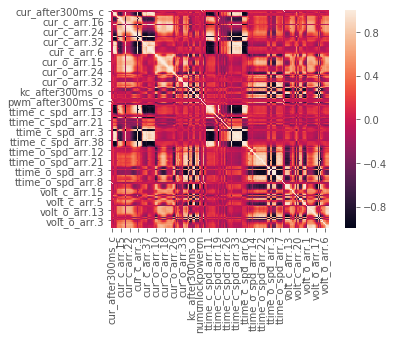

In [151]:
df_curr_km = df_reff.iloc[:, 1:199]
cor_curr_km = df_curr_km.corr()
sns.heatmap(cor_curr_km, square = True)

In [152]:
df.head()
#looking back for ref

,batt_volt,block,comp_type,cur_after300ms_c,cur_after300ms_o,cur_c_arr.1,cur_c_arr.10,cur_c_arr.11,cur_c_arr.12,cur_c_arr.13,...,volt_o_arr.19,volt_o_arr.2,volt_o_arr.20,volt_o_arr.3,volt_o_arr.4,volt_o_arr.5,volt_o_arr.6,volt_o_arr.7,volt_o_arr.8,volt_o_arr.9
0,78.0,NaN,1,3.95,2.50,0.116670,0.343039,0.247163,0.173571,0.157684,...,32,22,14,64,71,74,75,76,75,72
1,78.0,NaN,1,3.95,2.50,0.101500,0.430537,0.312741,0.231342,0.137976,...,13,30,1,68,73,74,75,76,73,71
2,78.0,NaN,1,3.95,2.50,0.088552,0.377274,0.273320,0.197023,0.154048,...,9,29,1,69,73,74,75,75,72,69
3,78.0,NaN,1,3.95,2.50,0.143332,0.551478,0.419680,0.252282,0.161627,...,10,30,1,69,73,74,75,75,72,69
4,78.0,NaN,1,4.00,2.45,0.146724,0.619444,0.485517,0.344962,0.220329,...,9,33,1,69,73,74,75,75,72,69


In [172]:
X = df_kmc.iloc[:, :198].values

In [173]:
#Applying k means to create 2 groups 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [174]:
wcss = []  #“Within cluster sum of squares by cluster”
for i in range (1, 5):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [175]:
#Elbow method to see the distrubution
wcss

[319098537.92371154, 99528782.22080918, 58776587.87409384, 44423695.090795875]

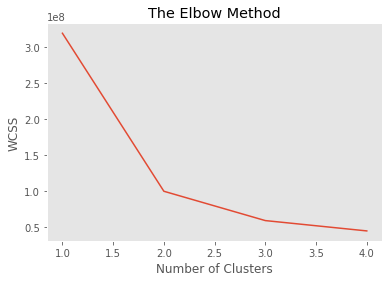

In [176]:
#Elbow method to see the distrubution
plt.plot(range (1, 5), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()

In [177]:
#building model
kmeans = KMeans(n_clusters= 2, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)

In [178]:
y_kmeans = kmeans.fit(X)

In [179]:
y_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [180]:
labels = y_kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.5573406878911794

In [181]:
y_kmeans = kmeans.predict(X)
y_kmeans

array([1, 1, 1, ..., 0, 0, 0])

In [182]:
ky_means = y_kmeans

In [183]:
np.savetxt(r'ky_means.csv',ky_means)

In [184]:
{i: np.where(y_kmeans == i)[0] for i in range(kmeans.n_clusters)}

{0: array([ 755,  756,  757,  758,  759,  760,  761,  762,  763,  764,  765,
         766,  767,  768,  769,  770,  771,  772,  773,  774,  775,  776,
         777,  778,  779,  780,  781,  782,  783,  784,  785,  786,  787,
         788,  789,  790,  791,  792,  793,  794,  795,  796,  797,  798,
         799,  800,  801,  802,  803,  804,  805,  806,  807,  808,  809,
         810,  811,  812,  813,  814,  815,  816,  817,  818,  819,  820,
         821,  822,  823,  824,  825,  826,  827,  828,  829,  830,  831,
         832,  833,  834,  835,  836,  837,  838,  839,  840,  841,  842,
         843,  844,  845,  846,  847,  848,  849,  850,  851,  852,  853,
         854,  855,  856,  857,  858,  859,  860,  861,  862,  863,  864,
         865,  866,  867,  868,  869,  870,  871,  872,  873,  874,  875,
         876,  877,  878,  879,  880,  881,  882,  883,  884,  885,  886,
         887,  888,  889,  890,  891,  892,  893,  894,  895,  896,  897,
         898,  899,  900,  901,  90

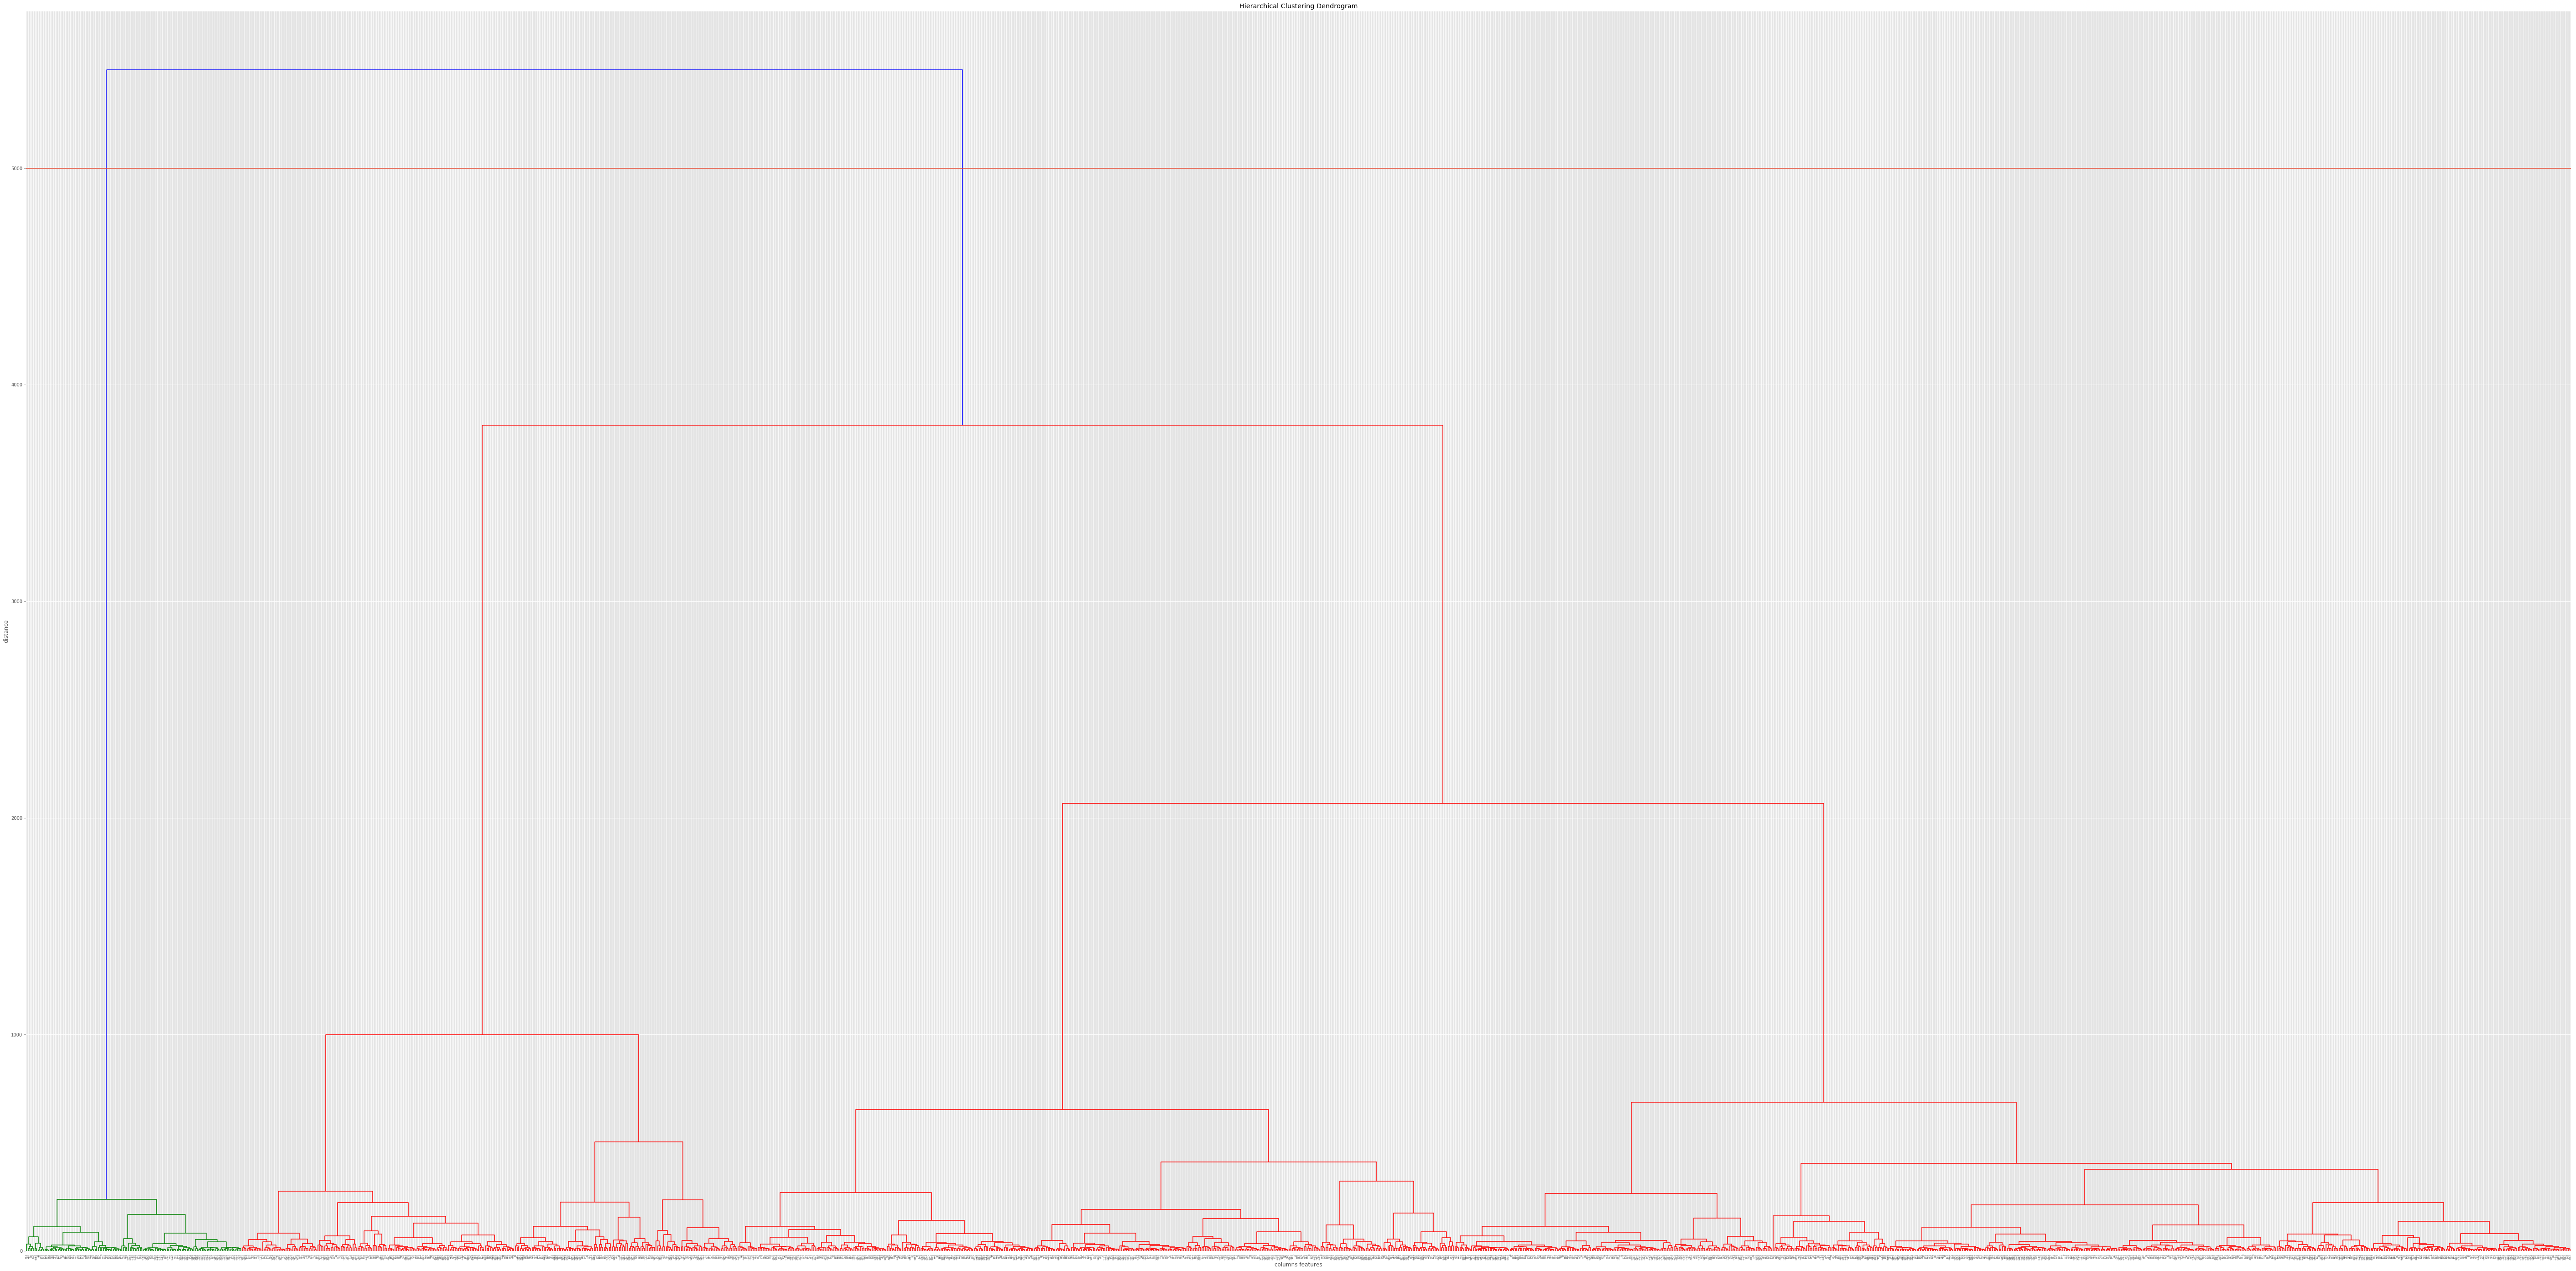

In [185]:
#plot dendrogram for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
y = df_kmc.iloc[:, 1:195]
Z = linkage(y, 'ward')
plt.figure(figsize=(100, 50))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('columns features')
plt.ylabel('distance')
dendrogram(Z)
max_d=5000
plt.axhline(y=max_d)
plt.show()

In [186]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [187]:
y_hc

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [188]:
print(y_hc.shape)

(1520,)


In [189]:
print(y_hc)

[1 1 1 ... 0 0 0]


In [190]:
np.savetxt(r'Hierarchical_Clustering.csv',y_hc)